## Seattle AirBnb Analyis

Analyis of Seattle AirBnb Dataset, in order to find what influences prices, reviews, etc.

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]

In [2]:
df = pd.read_csv('./archive/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


### Q1. What parameters influence the price at an AirBnb?

Ideas to consider: bedrooms, bathrooms, property type, room type,  
Attempt to predict the price of a listing using these parameters.

In [3]:
influence_df = df[['bedrooms', 'bathrooms', 'room_type', 'accommodates','price']]

In [4]:
influence_df.head()

,bedrooms,bathrooms,room_type,accommodates,price
0,1.0,1.0,Entire home/apt,4,$85.00
1,1.0,1.0,Entire home/apt,4,$150.00
2,5.0,4.5,Entire home/apt,11,$975.00
3,0.0,1.0,Entire home/apt,3,$100.00
4,3.0,2.0,Entire home/apt,6,$450.00


Check if there are any missing values

In [5]:
np.sum(influence_df.isnull())

bedrooms         6
bathrooms       16
room_type        0
accommodates     0
price            0
dtype: int64

There are 6 missing values for "bedrooms" column and 16 missing values for "bathrooms" column. We need to check the details for the rows with missing values.

In [6]:
influence_df[influence_df['bedrooms'].isnull()]

,bedrooms,bathrooms,room_type,accommodates,price
1429,NaN,1.0,Entire home/apt,2,$80.00
1492,NaN,1.0,Entire home/apt,6,$200.00
1493,NaN,1.0,Entire home/apt,4,$132.00
1853,NaN,1.0,Entire home/apt,2,$95.00
2619,NaN,1.0,Entire home/apt,2,$99.00
2915,NaN,1.0,Entire home/apt,2,$75.00


In [7]:
influence_df[influence_df['bathrooms'].isnull()]

,bedrooms,bathrooms,room_type,accommodates,price
1242,1.0,NaN,Entire home/apt,4,$107.00
1314,1.0,NaN,Entire home/apt,4,$135.00
1357,2.0,NaN,Entire home/apt,6,$186.00
1378,1.0,NaN,Entire home/apt,4,$149.00
1961,1.0,NaN,Private room,4,$280.00
1975,1.0,NaN,Private room,1,$62.00
2048,2.0,NaN,Entire home/apt,4,$150.00
2096,1.0,NaN,Private room,2,$75.00
2306,1.0,NaN,Entire home/apt,3,$105.00
2408,1.0,NaN,Private room,2,$60.00


Since, the rest of the columns have data, we cannot simply drop the rows. We need to impute data for the missing values. Luckily, we can use the mode for both cases, since most AirBnb's come with 1 'bathroom' and 'bedroom'.

In [8]:
fill_mode = lambda col: col.fillna(col.mode()[0], inplace=True)

In [9]:
influence_df.apply(fill_mode, axis=0)

bedrooms        None
bathrooms       None
room_type       None
accommodates    None
price           None
dtype: object

In [10]:
np.sum(influence_df.isnull())

bedrooms        0
bathrooms       0
room_type       0
accommodates    0
price           0
dtype: int64

Fixed missing values.

Now, make dummy columns for "room_type", and append it to influence_df as well as drop "room_type" column

In [11]:
dummy_columns = pd.get_dummies(influence_df['room_type'])

In [12]:
influence_df = pd.concat([influence_df, dummy_columns], axis=1)

In [13]:
influence_df = influence_df.drop('room_type', axis=1)

In [14]:
influence_df.head()

,bedrooms,bathrooms,accommodates,price,Entire home/apt,Private room,Shared room
0,1.0,1.0,4,$85.00,1,0,0
1,1.0,1.0,4,$150.00,1,0,0
2,5.0,4.5,11,$975.00,1,0,0
3,0.0,1.0,3,$100.00,1,0,0
4,3.0,2.0,6,$450.00,1,0,0


Since, the price is a string, we need to change to to a float, in order to do any sort of prediction with it.

In [15]:
def makeNum(string):
    number = string.split('$')[1]
    number = number.replace(',', '')
    return float(number)

In [16]:
price_fixed= influence_df['price'].map(makeNum)

In [17]:
influence_df = influence_df.drop('price', axis=1)

In [18]:
influence_df = pd.concat([influence_df, price_fixed], axis=1)

In [19]:
influence_df.head()

,bedrooms,bathrooms,accommodates,Entire home/apt,Private room,Shared room,price
0,1.0,1.0,4,1,0,0,85.0
1,1.0,1.0,4,1,0,0,150.0
2,5.0,4.5,11,1,0,0,975.0
3,0.0,1.0,3,1,0,0,100.0
4,3.0,2.0,6,1,0,0,450.0


<AxesSubplot:>

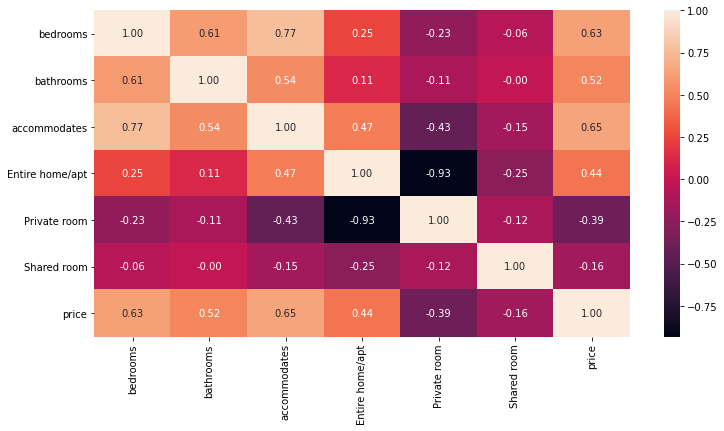

In [20]:
sns.heatmap(influence_df.corr(), annot=True, fmt='.2f')

Looking at the heatmap of the correlation between the variables we chose and the price, it does not look like there is strong correlation between them. The strongest being number of bedrooms and number of people the listing accomodates. we can still try to make a linear regression model, to try to predict the price.

#### Make model for predicting the price of an AirBnb listing 

Split data into training data and testing data at a 9 to 1 ratio.

In [21]:
X = influence_df[['bedrooms', 'bathrooms', 'Entire home/apt', 'Private room', 'Shared room', 'accommodates']]
Y = influence_df['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=55)

Setup linear model and start training with training data

In [22]:
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, Y_train)

LinearRegression(normalize=True)

In [23]:
test_result = lm_model.predict(X_test)

In [24]:
r2_score(Y_test, test_result)

0.6146641369401646

As we can see the regression score is about 0.61 (1.00 being perfect), which is on par with our assumption that none of the chosen variables provide significant insight into what affects the price of a listing.

### Question 2

What time in the year 2016 was Airbnb being used the most?

Ideas to consider: the date and availability

In [25]:
calendar_df = pd.read_csv('./archive/calendar.csv')
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Get data for all listings that is not available to book, and get counts by date.

In [26]:
booked = calendar_df[calendar_df['available'] == 'f']

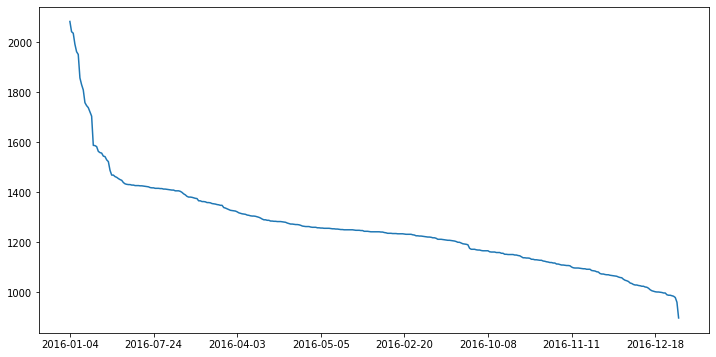

In [27]:
problem_booked = booked['date'].value_counts()
problem_booked.plot()
plt.show()

Convert to DateTime in order to keep linearity. Ran into issues with plotting without converting dates, as the plot would sort according to the counts. (See Above)

In [28]:
booked['date_converted'] = booked['date'].apply(pd.to_datetime)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
booked_dates = booked['date_converted'].value_counts()

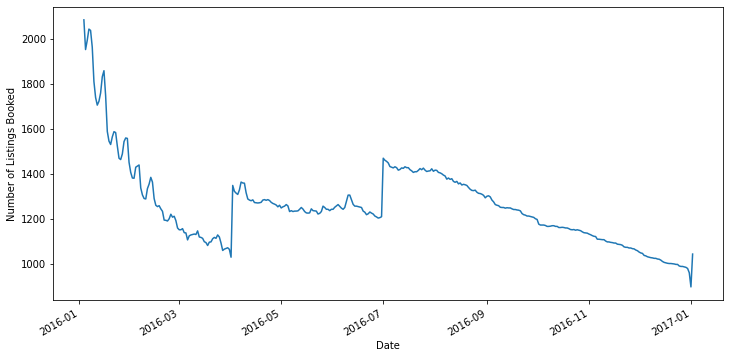

In [61]:
booked_plot = booked_dates.plot()
plt.xlabel("Date")
plt.ylabel("Number of Listings Booked")
plt.show()


According to the graph above the number of bookings taper down from the "Holiday Season" ie. December and January till about April. Then, there is a rise in bookings until August, when bookings start to taper down, until the next "Holiday Season" where we see a sharp rise again.

### Question 3

What are the average prices around each nighbourhood?

Ideas to consider: neighbourhood, latitude, longitude, price


In [31]:
area_df = df[['neighbourhood','neighbourhood_cleansed', 'latitude', 'longitude','price']]

In [32]:
np.sum(area_df.isnull())

neighbourhood             416
neighbourhood_cleansed      0
latitude                    0
longitude                   0
price                       0
dtype: int64

In [33]:
area_df.shape

(3818, 5)

There seems to be quite a few missing values from neighbourhood column, so we are going to use the neighbourhood_cleansed column for our analysis.

Convert prices to numbers so we can use the prices column.

In [34]:
area_prices_fixed = area_df['price'].apply(makeNum)

In [35]:
area_df = area_df.drop('price', axis=1)

In [36]:
area_df = pd.concat([area_df, area_prices_fixed], axis=1)

Let's get an overview of the dataframe

In [37]:
area_df.describe()

,latitude,longitude,price
count,3818.000000,3818.000000,3818.000000
mean,47.628961,-122.333103,127.976166
std,0.043052,0.031745,90.250022
min,47.505088,-122.417219,20.000000
25%,47.609418,-122.354320,75.000000
50%,47.623601,-122.328874,100.000000
75%,47.662694,-122.310800,150.000000
max,47.733358,-122.240607,1000.000000


The standard deviation of the price is about 90, so using 3 standard deviation to find outliers we get a range of -143 to 397. Since, price cannot be negative we will consider all values from the lower end. 

In [38]:
area_df[area_df['price'] > 397]

,neighbourhood,neighbourhood_cleansed,latitude,longitude,price
2,Queen Anne,West Queen Anne,47.629724,-122.369483,975.0
4,Queen Anne,West Queen Anne,47.632918,-122.372471,450.0
14,Queen Anne,West Queen Anne,47.639203,-122.365863,461.0
19,Queen Anne,West Queen Anne,47.636025,-122.358694,700.0
22,Queen Anne,West Queen Anne,47.635632,-122.358881,450.0
...,...,...,...,...,...
3636,Minor,Stevens,47.621119,-122.299738,450.0
3678,Fremont,Fremont,47.652568,-122.351361,500.0
3701,Fremont,Fremont,47.657471,-122.356488,450.0
3747,Fremont,Fremont,47.657675,-122.358685,400.0


There are 81 listings priced outside our range and are the outliers. However, we cannot simply drop these records because some areas have quite a few listings, indicating that the area might be more upscale and more desirable and therefor more expensive. But in areas where there is only one expensive listing we can assume those are outliers and drop them.

In [39]:
outliers = area_df[area_df['price'] > 397]

In [40]:
outliers['neighbourhood_cleansed'].value_counts() 

Belltown              9
West Queen Anne       8
Stevens               6
Broadway              6
Wallingford           5
Fremont               4
Montlake              3
East Queen Anne       3
Mann                  2
Sunset Hill           2
Westlake              2
Madrona               2
Green Lake            2
Leschi                2
North Admiral         2
Southeast Magnolia    2
Portage Bay           2
North Queen Anne      2
Windermere            1
Eastlake              1
South Lake Union      1
Lower Queen Anne      1
Fauntleroy            1
Phinney Ridge         1
Pike-Market           1
Loyal Heights         1
Roosevelt             1
Whittier Heights      1
North Beacon Hill     1
West Woodland         1
Lawton Park           1
Minor                 1
Adams                 1
First Hill            1
Alki                  1
Name: neighbourhood_cleansed, dtype: int64

In [41]:
outlier_list = outliers.groupby('neighbourhood_cleansed').filter( lambda x: len(x) < 2).index

In [42]:
len(outlier_list)

17

In [43]:
area_df = area_df.drop(axis=0, index=outlier_list)

In [44]:
area_df.shape

(3801, 5)

In [45]:
area_df = area_df[['neighbourhood_cleansed', 'price']]

So, we ended up dropping 17 records as outliers which resulted in 3801 records.

Group the data by values in the neighbourhood_cleansed column and find the mean of each.

In [46]:
area_df_summary = area_df.groupby('neighbourhood_cleansed').mean().sort_values('price', ascending=False)

<AxesSubplot:xlabel='neighbourhood_cleansed'>

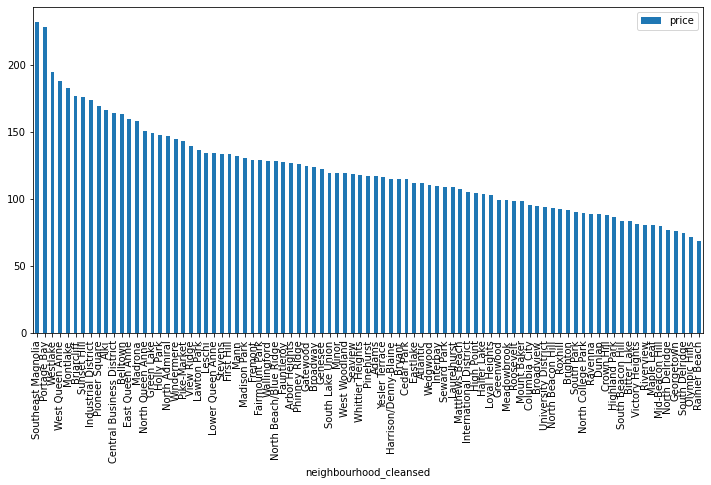

In [47]:
area_df_summary.plot.bar()

<AxesSubplot:xlabel='neighbourhood_cleansed'>

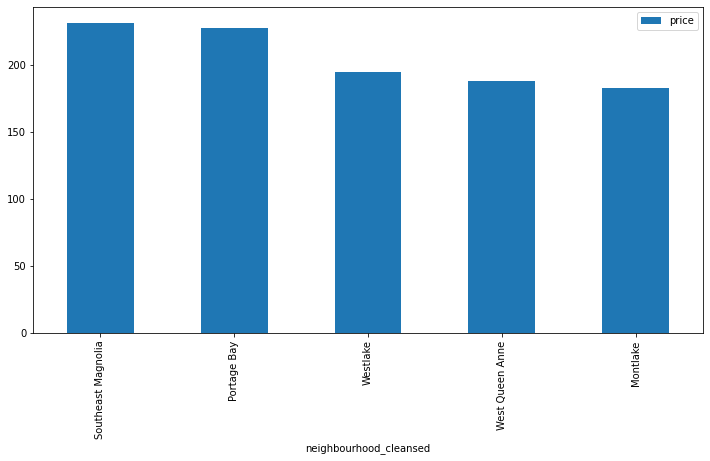

In [62]:
area_df_summary.head(5).plot.bar()

<AxesSubplot:xlabel='neighbourhood_cleansed'>

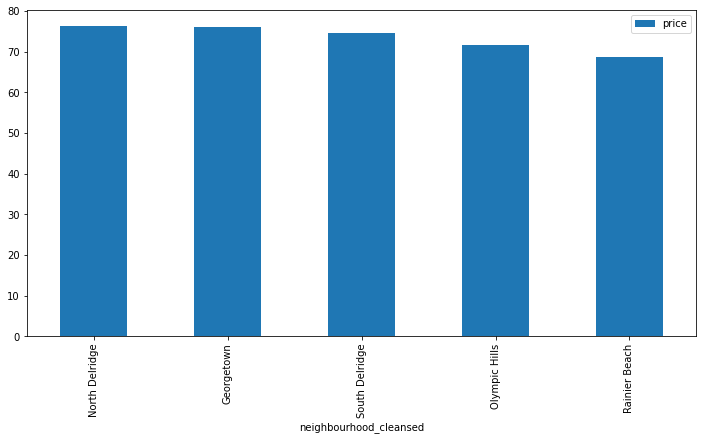

In [63]:
area_df_summary.tail(5).plot.bar()

In [66]:
combined = pd.concat([area_df_summary.head(5), area_df_summary.tail(5)], axis=1)

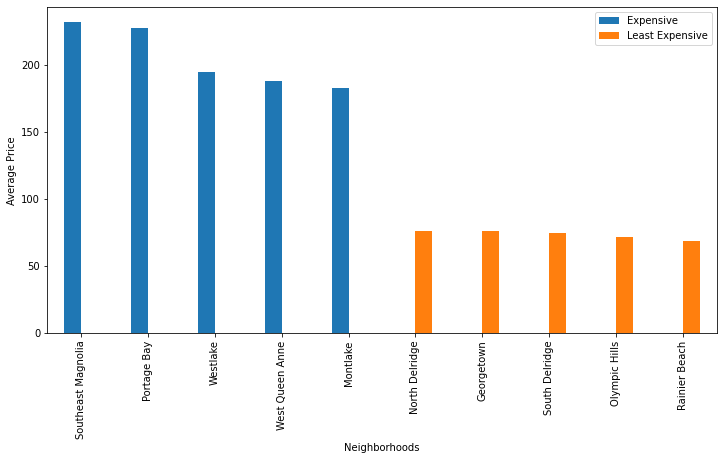

In [73]:
combined.plot.bar()
plt.xlabel('Neighborhoods')
plt.ylabel('Average Price')
plt.legend(['Expensive','Least Expensive'])

In [75]:
area_df_summary.head(5)

,price
neighbourhood_cleansed,
Southeast Magnolia,231.705882
Portage Bay,227.857143
Westlake,194.470588
West Queen Anne,187.769231
Montlake,182.789474


In [76]:
area_df_summary.tail(5)

,price
neighbourhood_cleansed,
North Delridge,76.375000
Georgetown,76.125000
South Delridge,74.666667
Olympic Hills,71.687500
Rainier Beach,68.555556
